# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

Отправлять дз не нужно, нужно закоммитить в github. Сдается дз лично преподавателю на рубежном контроле (13 марта)

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [16]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Cчитываем данные, полученные в результате выполнения домашнего задания из курса введения, в `data frame` библиотеки `pandas`. Достаем координаты и конвертируем в массив `numpy`. Возможно, в собранном вами файле кодировка будет иной.

In [8]:
data_df = pd.read_csv("geopos_vk(1).csv", sep=",", header=0)
data_df.head()

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,Мячковский б-р 3а,435,1,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.487519e+09
1,Дачная 2а,14,123,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.483478e+09
2,Лени Голикова 29,8,2,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,Героев Танкограда 63,8,158,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,Мусы Джалиля 14К1,36,99,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.485073e+09


In [38]:
x_geo = data_df[['latitude', 'longitude']]
data_df

       latitude  longitude
0     55.657941  37.751574
1     53.202017  50.141377
2     59.843376  30.231480
3     55.174954  61.451611
4     54.860834  83.091932
5     54.861114  83.091415
6     55.166948  61.395017
7     55.157006  61.365395
8     55.160365  61.380302
9     55.684858  37.718300
10    54.871906  83.106557
11    59.949213  30.234373
12    59.960462  30.286592
13    59.926720  30.368536
14    55.770968  37.591562
15    48.721596  44.535346
16    56.840941  60.652137
17    55.029394  82.933293
18    59.991147  30.307604
19    55.757116  37.631460
20    55.151862  61.304467
21    55.783104  37.598025
22    45.030744  39.107527
23    55.676783  37.762449
24    45.020991  39.000241
25    45.039534  38.979894
26    54.813967  56.059096
27    55.824390  37.622387
28    56.839774  60.615122
29    56.836150  60.600448
...         ...        ...
4970  60.147558  29.930392
4971  55.770216  37.595206
4972  59.940828  30.281698
4973  59.935985  30.345063
4974  59.958494  30.333143
4

,address,checkins,city,country,created,icon,latitude,longitude,pid,title,type,updated
0,Мячковский б-р 3а,435,1,1,1280741941,https://vk.com/images/places/clubs.png,55.657941,37.751574,1,Baila Baila,4,1.487519e+09
1,Дачная 2а,14,123,1,1280741941,https://vk.com/images/places/clubs.png,53.202017,50.141377,2,Lust,4,1.483478e+09
2,Лени Голикова 29,8,2,1,1280741941,https://vk.com/images/places/clubs.png,59.843376,30.231480,3,Тайфун,4,1.486398e+09
3,Героев Танкограда 63,8,158,1,1280741941,https://vk.com/images/places/clubs.png,55.174954,61.451611,4,Hollywood,4,1.470157e+09
4,Мусы Джалиля 14К1,36,99,1,1280741941,https://vk.com/images/places/clubs.png,54.860834,83.091932,5,Барабас,4,1.485073e+09
5,Мусы Джалиля 14,6,99,1,1280741941,https://vk.com/images/places/clubs.png,54.861114,83.091415,6,Опера,4,1.471622e+09
6,Труда 153,15,158,1,1280741941,https://vk.com/images/places/clubs.png,55.166948,61.395017,7,Малахит,4,1.470755e+09
7,Сони Кривой 81,3,158,1,1280741941,https://vk.com/images/places/clubs.png,55.157006,61.365395,8,Полет,4,1.455943e+09
8,просп. Ленина 66а,158,158,1,1280741941,https://vk.com/images/places/clubs.png,55.160365,61.380302,9,Уральские пельмени,4,1.487949e+09
9,Гурьянова 31,13,1,1,1280741941,https://vk.com/images/places/clubs.png,55.684858,37.718300,10,Salvador Dali,4,1.445916e+09


Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1 Баранчиков Максим	
2 Бекбулатов Рамзан	
3 Белозёров Михаил	
4 Бобылев Владислав	
5 Брызгалов Антон	
6 Будюк Алексей	
7 Валиуллин Альберт	
8 Валиуллин Артур	
9 Васильев Евгений	
10 Галицкий Игорь	
11 Горшков Сергей	
12 Гусев Вячеслав	
13 Дегтярев Роман	
14 Дементьев Максим	
15 Елохов Артур	
16 Ефимов Владислав	
17 Зайцев Александр	
18 Ильин Иван	
19 Имеев Мерген	
20 Камалбеков Тимур	
21 Капитонов Александр	
22 Каспарьянц Георгий	
23 Кафанов Олег	
24 Клейменов Андрей	
25 Козлов Иван	
26 Колмакова Татьяна	
27 Комов Евгений	
28 Крылов Иван	
29 Кузьмина Ирина	
30 Куклева Анна	
31 Курьянов Илья	
32 Лобанов Алексей	
33 Лозинский Иван	
34 Лузин Игорь	
35 Лукьянчиков Иван	
36 Неред Максим	
37 Новикова Анастасия	
38 Новичков Сергей	
39 Омаров Темирхан	
40 Павлова Анастасия	
41 Петренко Иван	
42 Пилюгин Вадим	
43 Плошкин Александр	
44 Полякова Вера	
45 Попкова Екатерина	
46 Преображенский Анатолий	
47 Пронин Сергей	
48 Пучкин Данила	
49 Рогачев Александр	
50 Руденко Дмитрий	
51 Рыбаков Владислав	
52 Санников Артём	
53 Скиба Глеб	
54 Страдомский Сергей	
55 Тескер Константин	
56 Трифанов Петр	
57 Хапкин Артем	
58 Хорошенький Илья	
59 Чокля Дмитрий	
60 Шмурак Денис	
61 Щербакова Елена	

In [2]:
N = 57 # put your index here

In [3]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)", 
    u"OPTICS. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print (u"Реализуем алгоритм кластеризации '%s'" % my_algorithm)

Реализуем алгоритм кластеризации 'Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

In [126]:
#Реализация иерархической кластеризации с поддержкой average, complete, single расстояний между кластерами
from sklearn.base import BaseEstimator, ClusterMixin
from scipy.spatial import distance

class Clustering(BaseEstimator, ClusterMixin):
  
    
    def __init__(self, k = 3, y = 1, **kwargs):
        
        self.k = k
        
            
        return
    
    def single(self, i, j):
        dist_ = 1000000000000.0
        for i_ in self.label_dict[i]:
            for j_ in self.label_dict[j]:
                if distance.euclidean(self.data[i_], self.data[j_]) < dist_:
                    dist_ = distance.euclidean(self.data[i_], self.data[j_])
        return dist_
    
    
    def complete(self, i, j):
        dist_ = 0
        for i_ in self.label_dict[i]:
            for j_ in self.label_dict[j]:
                dist_ += distance.euclidean(self.data[i_], self.data[j_])
                
                
        return dist_/(len(self.label_dict[i]) * len(self.label_dict[j]))
    
    def average(self, i, j):
        dist_ = -1
        for i_ in self.label_dict[i]:
            for j_ in self.label_dict[j]:
                if distance.euclidean(self.data[i_], self.data[j_]) > dist_:
                    dist_ = distance.euclidean(self.data[i_], self.data[j_])
        return dist_
        
        

    def fit(self, X, measure = 3):
        if measure == 1:
            distance_between_clusters = self.single
        if measure == 2:
            distance_between_clusters = self.complete
        if measure == 3:
            distance_between_clusters = self.average
        
        self.data = X
        c = self.data.shape[0]
        self.label_dict = {i:[i] for i in range(self.data.shape[0])}
        while (c > self.k):
            dist = 1000000000000.0
            ind_1 = 0
            ind_2 = 0
            for i in range(self.data.shape[0]):
                for j in range(i+1, self.data.shape[0]):
                    if (len(self.label_dict[i]) * len(self.label_dict[j]) > 0):
                        current_dist = distance_between_clusters(i,j)
                        
                        if current_dist < dist:
                            dist = current_dist
                            ind_1 = i
                            ind_2 = j 
            
            self.label_dict[ind_1] = self.label_dict[ind_1] + self.label_dict[ind_2]
            self.label_dict[ind_2] = [] 
            c -= 1
            #print (c)
            #pl.scatter(self.data[:, 0], self.data[:, 1], c=self.predict(self.data), lw=0, s=30)
            #pl.show()
        return self
    
    
    def fit_predict(self, x, measure=1):
        temp_x = x
        self.fit(temp_x, measure)
        clusters_labels = np.zeros(x.shape[0])
        for j in self.label_dict.keys():
            for i in self.label_dict[j]:
                clusters_labels[i] = j
        return clusters_labels

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

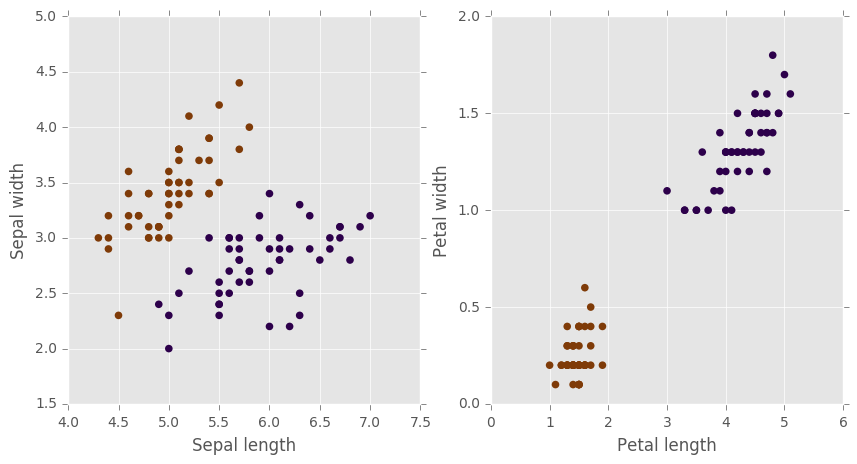

In [13]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [14]:
#Все значения критерия для всех трех равны 1
cl = Clustering(k = 2)
pred_iris_single = cl.fit_predict(x_iris, measure = 1)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris_single))
pred_iris_complete = cl.fit_predict(x_iris, measure = 2)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris_complete))
pred_iris_average = cl.fit_predict(x_iris, measure = 3)
print ("Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris_average))

Adjusted Rand index for iris is: 1.00
Adjusted Rand index for iris is: 1.00
Adjusted Rand index for iris is: 1.00


Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

In [251]:
#Реализуем критерий силуэт для иерархической кластеризации
def quality(X, t, r):
    cl = Clustering(k = t)
    labels_ = cl.fit_predict(X, measure = r)
    silhouette = 0
    for i in range(X.shape[0]):
        count = 0
        dist = 1000000000000000
        a = 0
        for j in range(X.shape[0]):
            if labels_[i] == labels_[j]:
                a += distance.euclidean(X[i], X[j])
                count += 1
            else:
                if distance.euclidean(X[i], X[j]) < dist:
                    dist = distance.euclidean(X[i], X[j])
        silhouette += (dist - a/count)/max(a/count, dist)
    return silhouette/X.shape[0]
  



In [252]:
#Подбор оптимальных параметров
def opt(X):
    clusters_index = [2,3,4]
    criteria = np.zeros(len(clusters_index))
    for i in clusters_index:
        list(criteria).append(quality(X, i, 2))
    a = -99999999999999
    cluster = 0
    for i in range(len(criteria)):
        if criteria[i] > a:
            a = criteria[i]
            cluster = clusters_index[i]
    return cluster

In [135]:
opt(x_iris)

2

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

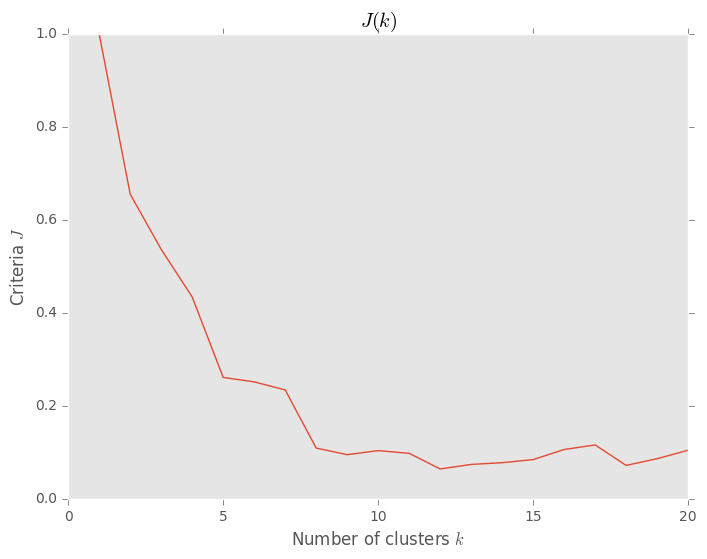

In [127]:
ks = range(2, 21)
criteria = np.zeros(len(ks))

for i, k in enumerate(ks):
    #cls = Clustering()
    #y = cls.fit_predict(x)
    criteria[i] = quality(x_iris, k, 1)
    
pl.figure(figsize=(8, 6))
pl.plot(ks, criteria)
pl.title("$J(k)$")
pl.ylabel("Criteria $J$")
pl.xlabel("Number of clusters $k$")
pl.grid()
pl.show()

Далее необходимо кластеризовать данные, используя выбранное количество кластеров, и визуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время. 

Визуализируем кластеризацию на карте

In [111]:
mos_center = [55.750475, 37.619020]
mos_min_lat, mos_max_lat = 55.564141, 55.908930
mos_min_lon, mos_max_lon = 37.344362, 37.879945
data_moscow = pd.DataFrame(x_geo[x_geo.latitude.between(mos_min_lat, mos_max_lat) &
                   x_geo.longitude.between(mos_min_lon, mos_max_lon)])

In [112]:
data_moscow.shape

(1671, 2)

In [253]:
#Выберем часть данных для кластеризации по Москве 
data_moscow.index[1]
data_moscow.values
data_to_explore = []

for i in range(0, 1001, 4):
    t = []
    t.append(data_moscow.values[i][0])
    t.append(data_moscow.values[i][1])
    data_to_explore.append(t)
data_to_explore = np.array(data_to_explore)
x_iris
data_to_explore.shape


(100, 4)

In [254]:
#Подберем лучшее по критерию силуэта количество кластеров
opt(data_to_explore)

2

Получили, что наилучшее количество кластеров для наших данных - это 2.

Визуализируйте интересные участки (может быть это Москва) в приближенном виде. Постройте 3 (или более, в зависимости от данных, что вам самим бы хотелось увидеть ближе) увеличенных изображений карты с кластеризацией.

In [255]:
#Запустим кластеризацию с тем количеством кластеров, которое нам выдала функция opt
cl = Clustering(k = 2)
labels = cl.fit_predict(data_to_explore, measure = 2)

In [227]:
moscow_data = pd.DataFrame(data_to_explore).copy()
moscow_data = moscow_data.rename( columns={0: 'latitude', 1: "longitude"})
moscow_data

,latitude,longitude
0,55.657941,37.751574
1,55.783104,37.598025
2,55.702617,37.766585
3,55.828703,37.633688
4,55.782486,37.579381
5,55.599072,37.538373
6,55.785792,37.595609
7,55.673869,37.559505
8,55.729270,37.609124
9,55.745985,37.655975


In [153]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from folium.plugins import MarkerCluster

In [256]:
labels = np.array(labels)

In [237]:
labels
colors = np.empty(labels.shape[0], dtype = 'S10')
colors[labels == 0] = 'green'
colors[labels == 1] = 'blue'
colors[labels == 10] = 'red'
colors[labels == 81] = 'yellow'
colors[labels == 161] = 'black'
colors

array([b'green', b'blue', b'green', b'blue', b'blue', b'blue', b'blue',
       b'blue', b'blue', b'blue', b'red', b'blue', b'blue', b'blue',
       b'blue', b'blue', b'blue', b'blue', b'blue', b'red', b'blue',
       b'blue', b'blue', b'red', b'blue', b'blue', b'blue', b'blue',
       b'blue', b'blue', b'blue', b'blue', b'blue', b'blue', b'blue',
       b'red', b'blue', b'blue', b'blue', b'blue', b'blue', b'blue',
       b'blue', b'blue', b'blue', b'blue', b'blue', b'blue', b'blue',
       b'green', b'blue', b'blue', b'blue', b'blue', b'blue', b'blue',
       b'blue', b'red', b'red', b'blue', b'blue', b'blue', b'red', b'blue',
       b'blue', b'blue', b'blue', b'red', b'blue', b'blue', b'blue',
       b'blue', b'blue', b'green', b'blue', b'blue', b'blue', b'blue',
       b'blue', b'blue', b'blue', b'yellow', b'blue', b'blue', b'blue',
       b'blue', b'red', b'blue', b'blue', b'blue', b'yellow', b'blue',
       b'blue', b'blue', b'blue', b'blue', b'blue', b'blue', b'blue',
       b'blu

In [238]:
#По какой-то причине он не прорисовывает карту нормально
moscow = folium.Map(location=mos_center, zoom_start=11, control_scale=True)
#marker_cluster = MarkerCluster(locations=moscow_data[['latitude', 'longitude']].values, icons = colors)
marker_cluster.add_to(moscow)
moscow

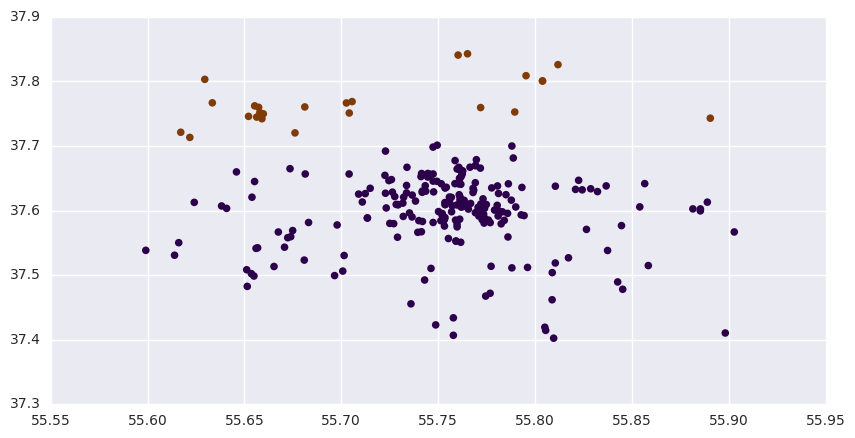

In [257]:
#Пришлось нарисовать вот так
pl.figure(figsize=(10, 5))
pl.scatter(moscow_data['latitude'], moscow_data['longitude'], c=labels, cmap=pl.cm.PuOr, lw=0, s=30)

Итог кластеризации - видно, что выделяются два кластера.
Первый - на севере Москвы, второй - центр, запад, юг, восток.

Какой вывод можно сделать о качестве кластеризации?

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.